<a href="https://colab.research.google.com/github/Vasyl808/deepfake_video_detection/blob/main/fakeavceleb(train_test_split)_balanced_ready.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install facenet_pytorch --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.9 MB/s eta 0:00:00


In [3]:
!gdown --fuzzy https://drive.google.com/file/d/1EUhGqfaI7jrupJfeJxhvrAXwhd-RVSuY/view?usp=sharing -O FakeAVCeleb.zip

Downloading...
From (original): https://drive.google.com/uc?id=1EUhGqfaI7jrupJfeJxhvrAXwhd-RVSuY
From (redirected): https://drive.google.com/uc?id=1EUhGqfaI7jrupJfeJxhvrAXwhd-RVSuY&confirm=t&uuid=630f573b-2a3b-4dc4-ab88-08203954d2d9
To: /content/FakeAVCeleb.zip
100% 6.40G/6.40G [01:06<00:00, 96.4MB/s]


In [4]:
!unzip /content/FakeAVCeleb.zip

Streaming output truncated to the last 5000 lines.
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id01075_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id01216_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id01231_XXpYdOHUF-g.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id01238_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id02466_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id03556_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id03605_wavtolip.mp4  
  inflating: FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian (American)/women/id01227/00052_id03707_pwNcRPQ5qdo.mp4  
  inflating: FakeAVCeleb_v1.2/F

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Завантажуємо та обробляємо дані
df = pd.read_csv('/content/FakeAVCeleb/meta_data.csv')

# Вибираємо лише категорії A та C
df_filtered = df[df['category'].isin(['A', 'C'])]

# Фільтруємо до 500 унікальних джерел у категорії "C"
df_category_c = df_filtered[df_filtered['category'] == 'C']
df_category_c_unique = df_category_c.drop_duplicates(subset=['source']).head(500)

# Переконуємось, що в категорії "C" дійсно 500 унікальних джерел
if df_category_c_unique['source'].nunique() < 500:
    raise ValueError("Недостатньо унікальних джерел у категорії 'C'.")

# Фільтруємо до 500 записів у категорії "A"
df_category_a = df_filtered[df_filtered['category'] == 'A'].head(500)

# Об’єднуємо обидві вибірки
df_sampled = pd.concat([df_category_a, df_category_c_unique])

# Застосовуємо групування та вибираємо до 50 унікальних значень у кожній комбінації
df_unique = df_sampled.groupby(['category', 'race', 'gender']).apply(lambda x: x.drop_duplicates(subset=['source', 'path']).head(50))
df_unique = df_unique.reset_index(drop=True)

# Створюємо стовпець для стратефікації
df_unique['stratify_col'] = df_unique['category'].astype(str) + '_' + df_unique['race'] + '_' + df_unique['gender']

# Розділяємо на тренувальний і тестовий набори, використовуючи стратефікацію
train_df, test_df = train_test_split(
    df_unique,
    test_size=0.2,
    random_state=42,
    stratify=df_unique['stratify_col']
)

# Видаляємо допоміжний стовпець для стратефікації
train_df = train_df.drop(columns=['stratify_col'])
test_df = test_df.drop(columns=['stratify_col'])

# Зберігаємо результати у файли CSV
train_df.to_csv("train_dataset.csv", index=False)
test_df.to_csv("test_dataset.csv", index=False)


<ipython-input-5-fd89063fc581>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_unique = df_sampled.groupby(['category', 'race', 'gender']).apply(lambda x: x.drop_duplicates(subset=['source', 'path']).head(50))


In [6]:
train_df

,source,target1,target2,method,category,type,race,gender,path,Unnamed: 9
733,id07058,id03344,-,faceswap,C,FakeVideo-RealAudio,Asian (South),men,00010_id03344_vyNnOo6lU0o_faceswap.mp4,FakeAVCeleb/FakeVideo-RealAudio/Asian (South)/...
296,id07236,-,-,real,A,RealVideo-RealAudio,Asian (South),women,00143.mp4,FakeAVCeleb/RealVideo-RealAudio/Asian (South)/...
642,id08299,0.mp4,-,faceswap,C,FakeVideo-RealAudio,Asian (East),men,00110_0.mp4,FakeAVCeleb/FakeVideo-RealAudio/Asian (East)/m...
522,id01392,1.mp4,-,faceswap,C,FakeVideo-RealAudio,African,men,00167_1.mp4,FakeAVCeleb/FakeVideo-RealAudio/African/men/id...
984,id00823,id00395,-,faceswap,C,FakeVideo-RealAudio,Caucasian (European),women,00125_id00395_wM5kGJfTtEM_faceswap.mp4,FakeAVCeleb/FakeVideo-RealAudio/Caucasian (Eur...
...,...,...,...,...,...,...,...,...,...,...
399,id03781,-,-,real,A,RealVideo-RealAudio,Caucasian (American),women,00113.mp4,FakeAVCeleb/RealVideo-RealAudio/Caucasian (Ame...
847,id04216,0.mp4,-,faceswap,C,FakeVideo-RealAudio,Caucasian (American),men,00470_0.mp4,FakeAVCeleb/FakeVideo-RealAudio/Caucasian (Ame...
115,id02561,-,-,real,A,RealVideo-RealAudio,Asian (East),men,02561.mp4,FakeAVCeleb/RealVideo-RealAudio/Asian (East)/m...
13,id00944,-,-,real,A,RealVideo-RealAudio,African,men,00135.mp4,FakeAVCeleb/RealVideo-RealAudio/African/men/id...


In [7]:
print("\nРозподіл за race та gender для кожного класу:")
for category in test_df['category'].unique():
    print(f"\nCategory {category}:")
    print(test_df[test_df['category'] == category][['race', 'gender']].value_counts())



Розподіл за race та gender для кожного класу:

Category C:
race                  gender
African               men       10
                      women     10
Asian (East)          men       10
                      women     10
Asian (South)         men       10
                      women     10
Caucasian (American)  men       10
                      women     10
Caucasian (European)  men       10
                      women     10
Name: count, dtype: int64

Category A:
race                  gender
African               men       10
                      women     10
Asian (East)          men       10
                      women     10
Asian (South)         men       10
                      women     10
Caucasian (American)  men       10
                      women     10
Caucasian (European)  men       10
                      women     10
Name: count, dtype: int64


In [8]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('train_dataset.csv')


result = {}
for _, row in df.iterrows():
    # Формування ключа з шляху
    s = '/'
    file_path = '/content/' + str(row['Unnamed: 9']) + s + row['path']

    label = row['category']


    result[file_path] = {
        'label': label
    }


with open('output_balenced_train.json', 'w') as json_file:
    json.dump(result, json_file)

In [9]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('test_dataset.csv')


result = {}
for _, row in df.iterrows():
    # Формування ключа з шляху
    s = '/'
    file_path = '/content/' + str(row['Unnamed: 9']) + s + row['path']

    label = row['category']


    result[file_path] = {
        'label': label
    }


with open('output_balenced_test.json', 'w') as json_file:
    json.dump(result, json_file)

In [10]:
import json
from collections import Counter

# Зчитування JSON файлу
with open('output_balenced_train.json', 'r') as json_file:
    data = json.load(json_file)

# Ініціалізація лічильника для підрахунку лейблів
label_counts = Counter()

# Підрахунок кожного лейбла
for item in data.values():
    label_counts[item['label']] += 1

# Вивід розподілу лейблів
for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")


Label: C, Count: 400
Label: A, Count: 400


In [11]:
import cv2
import itertools
import json
import numpy as np
import pandas as pd
import random
from torch.nn import functional as F
import os.path
import time
import torch
from torch import nn
from torch.nn import functional
import glob
import datetime
import subprocess
from facenet_pytorch import MTCNN
import shutil
import matplotlib.pyplot as plt
from pathlib import Path


class FaceDeepfakeDataset(torch.utils.data.Dataset):
    def __init__(self, folders, n_frames=None, n_audio_reads=50027, train=True, device=None, cache_folder='/content/face_encode_cache'):
        self.n_frames = n_frames
        self.videos = []
        self.train = train
        self.device = device if device is not None else torch.device("cpu")
        self.cache_folder = cache_folder
        self.detector = MTCNN(device=device, post_process=False)

        # Load video paths
        for i in range(len(folders)):
            if train:
                with open('/content/output_balenced_train.json') as f:
                    videos = json.load(f)
                    videos = [(video, metadata) for (video, metadata) in videos.items()]
                    self.videos += videos
            else:
                self.videos += glob.glob(folders[i] + "/*.mp4")

        if self.cache_folder:
            os.makedirs(self.cache_folder, exist_ok=True)

    def __process_frame(self, frame, prev_frame):
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        boxes, _ = self.detector.detect(frame, landmarks=False)  # Отримуємо координати обличчя

        if boxes is None:
            face = prev_frame
            face = cv2.resize(face, (224, 224))
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0
            return face
        else:
            # Беремо перше обличчя (якщо знайдено кілька)
            box = boxes[0]

            # Розширюємо рамку на 30%
            width = box[2] - box[0]
            height = box[3] - box[1]
            expand_x = width * 0.3 / 2
            expand_y = height * 0.3 / 2
            x1 = max(int(box[0] - expand_x), 0)
            y1 = max(int(box[1] - expand_y), 0)
            x2 = min(int(box[2] + expand_x), frame.shape[1])
            y2 = min(int(box[3] + expand_y), frame.shape[0])

            # Обрізаємо зображення за новими координатами
            face = frame[y1:y2, x1:x2]
            face = cv2.resize(face, (224, 224))  # Масштабуємо до 300x300

            # Перетворюємо на тензор і нормалізуємо
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0

        return face

    def __pad_or_trim_frames(self, frames):
        if len(frames) == self.n_frames:
            return frames
        elif len(frames) < self.n_frames:
            # Дублюємо останній кадр поки не досягнемо необхідної кількості
            frames += [frames[-1]] * (self.n_frames - len(frames))
        elif len(frames) > self.n_frames:
            # Залишаємо тільки перші n_frames кадрів
            frames = frames[:self.n_frames]
        return frames

    def __getitem__(self, n):
        if self.train:
            video, metadata = self.videos[n]
        else:
            video = self.videos[n]

        # Check if cached frames exist
        cache_file = None
        if self.cache_folder:
            video_name = video.replace('.mp4', '_frames.pt')
            video_name = video_name.replace(' ', '_')
            video_name = video_name.replace('/', '_')
            cache_file = os.path.join(self.cache_folder, video_name)
            if os.path.exists(cache_file):
                frames = torch.load(cache_file).to(self.device)
                if self.train:
                    label = 0.0
                    if metadata['label'] == 'C' or metadata['label'] == 'D':
                        label = 1.0
                    return frames, torch.FloatTensor([label]).to(self.device)
                else:
                    return frames

        # Processing video frames
        if os.path.islink(video):
            video = os.readlink(video)

        cap = cv2.VideoCapture(video)
        prev_frame = torch.zeros((3, 224, 224))
        frames = []
        for _ in range(self.n_frames):
            ret, frame = cap.read()
            if not ret:
                break
            frames.append(self.__process_frame(frame, prev_frame))
            prev_frame = frame
        cap.release()

        # Pad or trim frames to ensure consistent length
        frames = self.__pad_or_trim_frames(frames)
        frames = torch.stack(frames).to(self.device)

        # Cache processed frames
        if cache_file:
            torch.save(frames, cache_file)

        # Return data
        if self.train:
            label = 0.0
            if metadata['label'] == 'C' or metadata['label'] == 'D':
                label = 1.0
            return frames, torch.FloatTensor([label]).to(self.device)
        else:
            return frames

    def __len__(self):
        return len(self.videos)

/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/mtcnn.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)
/usr/local

Label: tensor([1.], device='cuda:0')


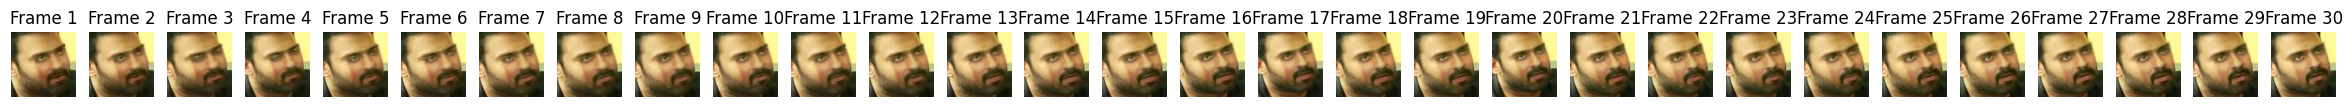

In [12]:
def test_face_dataset():
    TRAIN_FOLDERS = ['/content/FakeAVCeleb/']
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    dataset = FaceDeepfakeDataset(TRAIN_FOLDERS, n_frames=30, train=True, device=device)

    # Одержуємо перший батч
    for i, batch in enumerate(dataset):
        frames, label = batch
        print(f"Label: {label}")

        # Перевіряємо розмір кадрів
        if frames.size() != torch.Size([30, 3, 224, 224]):
            print(f"Unexpected frame size: {frames.size()}")

        # Візуалізуємо перші два кадри
        fig, axes = plt.subplots(1, 30, figsize=(30, 10))

        for j in range(30):
            ax = axes[j]
            frame = frames[j].cpu().permute(1, 2, 0).numpy()  # Перетворюємо з CHW в HWC і конвертуємо в NumPy
            ax.imshow(frame)  # Виводимо зображення
            ax.set_title(f"Frame {j+1}")
            ax.axis('off')

        plt.show()
        break  # Призупиняємо після першого батчу

test_face_dataset()

In [13]:
class FaceDeepfakeDatasetTest(torch.utils.data.Dataset):
    def __init__(self, folders, n_frames=None, n_audio_reads=50027, train=True, device=None, cache_folder=None):
        self.n_frames = n_frames
        self.videos = []
        self.train = train
        self.device = device if device is not None else torch.device("cpu")
        self.cache_folder = cache_folder
        self.detector = MTCNN(device=device, post_process=False)

        # Load video paths
        for i in range(len(folders)):
            if train:
                with open('/content/output_balenced_test.json') as f:
                    videos = json.load(f)
                    videos = [(video, metadata) for (video, metadata) in videos.items()]
                    self.videos += videos
            else:
                self.videos += glob.glob(folders[i] + "/*.mp4")

        if self.cache_folder:
            os.makedirs(self.cache_folder, exist_ok=True)

    def __process_frame(self, frame, prev_frame):
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        boxes, _ = self.detector.detect(frame, landmarks=False)  # Отримуємо координати обличчя

        if boxes is None:
            face = prev_frame
            face = cv2.resize(face, (224, 224))
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0
            return face
        else:
            # Беремо перше обличчя (якщо знайдено кілька)
            box = boxes[0]

            # Розширюємо рамку на 30%
            width = box[2] - box[0]
            height = box[3] - box[1]
            expand_x = width * 0.3 / 2
            expand_y = height * 0.3 / 2
            x1 = max(int(box[0] - expand_x), 0)
            y1 = max(int(box[1] - expand_y), 0)
            x2 = min(int(box[2] + expand_x), frame.shape[1])
            y2 = min(int(box[3] + expand_y), frame.shape[0])

            # Обрізаємо зображення за новими координатами
            face = frame[y1:y2, x1:x2]
            face = cv2.resize(face, (224, 224))  # Масштабуємо до 300x300

            # Перетворюємо на тензор і нормалізуємо
            face = torch.from_numpy(face).permute(2, 0, 1).float() / 255.0

        return face

    def __pad_or_trim_frames(self, frames):
        if len(frames) == self.n_frames:
            return frames
        elif len(frames) < self.n_frames:
            # Дублюємо останній кадр поки не досягнемо необхідної кількості
            frames += [frames[-1]] * (self.n_frames - len(frames))
        elif len(frames) > self.n_frames:
            # Залишаємо тільки перші n_frames кадрів
            frames = frames[:self.n_frames]
        return frames

    def __getitem__(self, n):
        if self.train:
            video, metadata = self.videos[n]
        else:
            video = self.videos[n]

        # Check if cached frames exist
        cache_file = None
        if self.cache_folder:
            video_name = video.replace('.mp4', '_frames.pt')
            video_name = video_name.replace(' ', '_')
            video_name = video_name.replace('/', '_')
            cache_file = os.path.join(self.cache_folder, video_name)
            if os.path.exists(cache_file):
                frames = torch.load(cache_file).to(self.device)
                if self.train:
                    label = 0.0
                    if metadata['label'] == 'C' or metadata['label'] == 'D':
                        label = 1.0
                    return frames, torch.FloatTensor([label]).to(self.device)
                else:
                    return frames

        # Processing video frames
        if os.path.islink(video):
            video = os.readlink(video)

        cap = cv2.VideoCapture(video)
        prev_frame = torch.zeros((3, 224, 224))
        frames = []
        for _ in range(self.n_frames):
            ret, frame = cap.read()
            if not ret:
                break
            frames.append(self.__process_frame(frame, prev_frame))
            prev_frame = frame
        cap.release()

        # Pad or trim frames to ensure consistent length
        frames = self.__pad_or_trim_frames(frames)
        frames = torch.stack(frames).to(self.device)

        # Cache processed frames
        if cache_file:
            torch.save(frames, cache_file)

        # Return data
        if self.train:
            label = 0.0
            if metadata['label'] == 'C' or metadata['label'] == 'D':
                label = 1.0
            return frames, torch.FloatTensor([label]).to(self.device)
        else:
            return frames

    def __len__(self):
        return len(self.videos)

Label: tensor([1.], device='cuda:0')


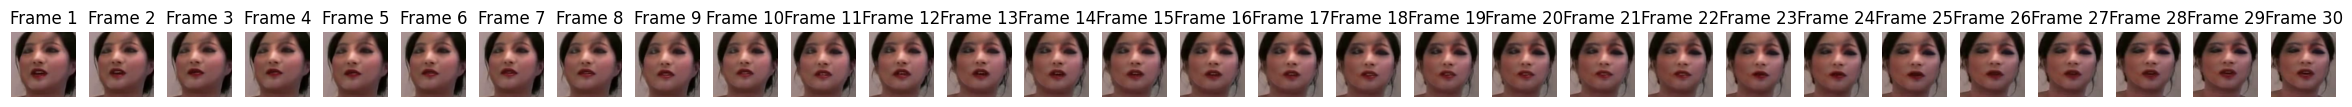

In [14]:
def test_face_dataset():
    TRAIN_FOLDERS = ['/content/fake_videos/train']
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    dataset = FaceDeepfakeDatasetTest(TRAIN_FOLDERS, n_frames=30, train=True, device=device, cache_folder=None)

    # Одержуємо перший батч
    for i, batch in enumerate(dataset):
        frames, label = batch
        print(f"Label: {label}")

        # Перевіряємо розмір кадрів
        if frames.size() != torch.Size([30, 3, 224, 224]):
            print(f"Unexpected frame size: {frames.size()}")

        # Візуалізуємо перші два кадри
        fig, axes = plt.subplots(1, 30, figsize=(30, 10))

        for j in range(30):
            ax = axes[j]
            frame = frames[j].cpu().permute(1, 2, 0).numpy()  # Перетворюємо з CHW в HWC і конвертуємо в NumPy
            ax.imshow(frame)  # Виводимо зображення
            ax.set_title(f"Frame {j+1}")
            ax.axis('off')

        plt.show()
        break  # Призупиняємо після першого батчу

test_face_dataset()

In [17]:
import torch
import torch.nn as nn
import math
from torch.nn import functional as F
import torchvision.models as models


class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.attention_weights = nn.Linear(hidden_dim, 1)  # для bidirectional LSTM подвоюємо розмір hidden_dim

    def forward(self, lstm_out):
        # lstm_out має розмір (batch_size, num_frames, hidden_dim * 2)
        weights = self.attention_weights(lstm_out)  # (batch_size, num_frames, 1)
        weights = F.softmax(weights, dim=1)  # Знаходимо ваги з активацією softmax

        # Вагове середнє по кадрам
        attention_output = torch.sum(weights * lstm_out, dim=1)  # (batch_size, hidden_dim * 2)
        return attention_output


class FaceClassifier(nn.Module):
    def __init__(self, n_linear_hidden=256, lstm_hidden_dim=256, num_lstm_layers=1):
        super(FaceClassifier, self).__init__()

        # Завантаження попередньо натренованої EfficientNet
        self.cnn = models.efficientnet_b7(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(self.cnn.children())[:-1])

        for param in self.feature_extractor.parameters():
            param.requires_grad = False

        self.feature_output_size = 2560  # EfficientNet B7 дає 2560 ознак

        # LSTM для обробки послідовності ознак кожного кадру
        self.lstm = nn.LSTM(input_size=self.feature_output_size,
                            hidden_size=lstm_hidden_dim,
                            num_layers=num_lstm_layers,
                            batch_first=True,
                            bidirectional=False)

        # Шар уваги
        self.attention = Attention(lstm_hidden_dim)

        # Повнозв'язні шари для класифікації
        self.fc1 = nn.Linear(lstm_hidden_dim, n_linear_hidden)
        self.fc2 = nn.Linear(n_linear_hidden, 1)

    def forward(self, vid_frames):
        batch_size, num_frames, channels, height, width = vid_frames.shape
        vid_frames = vid_frames.view(batch_size * num_frames, channels, height, width)

        # Використовуємо фічерний екстрактор
        with torch.no_grad():
            vid_features = self.feature_extractor(vid_frames)

        vid_features = vid_features.view(batch_size, num_frames, -1)  # (batch_size, num_frames, feature_output_size)

        # Обробка послідовності кадрів через LSTM
        lstm_out, _ = self.lstm(vid_features)  # lstm_out: (batch_size, num_frames, 2 * lstm_hidden_dim)

        # Використовуємо шар уваги для зваженого усереднення кадрів
        x = self.attention(lstm_out)  # (batch_size, 2 * lstm_hidden_dim)

        # Класифікаційні шари
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)

        return x

all train folders: ['/content/FakeAVCeleb'], <class 'list'>
all test folders: ['/content/fake_videos/train'], <class 'list'>
start time: 2024-11-10 08:20:18.568115
using device: cuda
100


23it [03:48, 10.13s/it]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [16:27,  9.88

[[340  60]
 [117 283]]


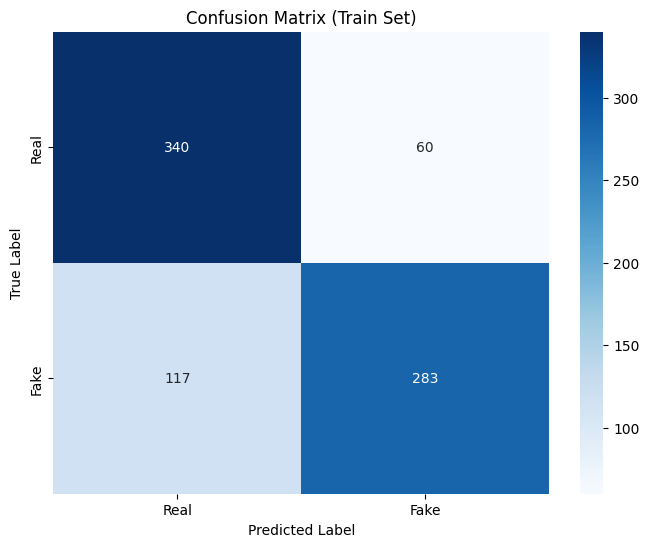

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.74      0.85      0.79       400
        Fake       0.83      0.71      0.76       400

    accuracy                           0.78       800
   macro avg       0.78      0.78      0.78       800
weighted avg       0.78      0.78      0.78       800

.........................
epoch: 0, train loss: 0.5063712500035763, val loss: 2.025485000014305, executed in: 1232.6024520397186
train total: 800, train correct: 623.0, train incorrect: 177.0, train accuracy: 0.7787500023841858
valid total: 200, valid correct: 103.0, valid incorrect: 97.0, valid accuracy: 0.5149999856948853


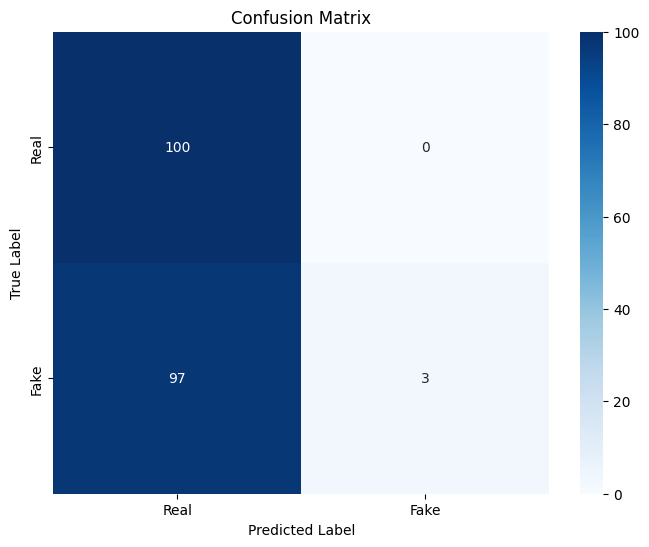

Classification Report:
              precision    recall  f1-score   support

        Real       0.51      1.00      0.67       100
        Fake       1.00      0.03      0.06       100

    accuracy                           0.52       200
   macro avg       0.75      0.52      0.37       200
weighted avg       0.75      0.52      0.37       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [06:15,  3.76s/it]

[[351  49]
 [ 48 352]]


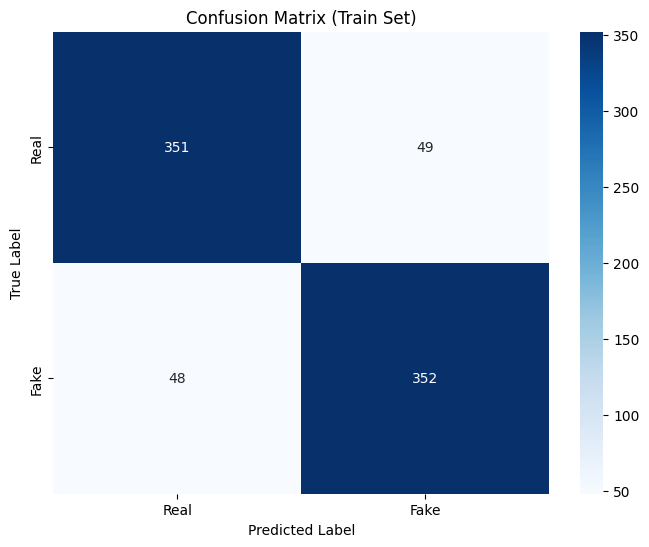

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.88      0.88      0.88       400
        Fake       0.88      0.88      0.88       400

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 1, train loss: 0.31129098013043405, val loss: 1.2451639205217362, executed in: 462.04970717430115
train total: 800, train correct: 703.0, train incorrect: 97.0, train accuracy: 0.8787499666213989
valid total: 200, valid correct: 133.0, valid incorrect: 67.0, valid accuracy: 0.6649999618530273


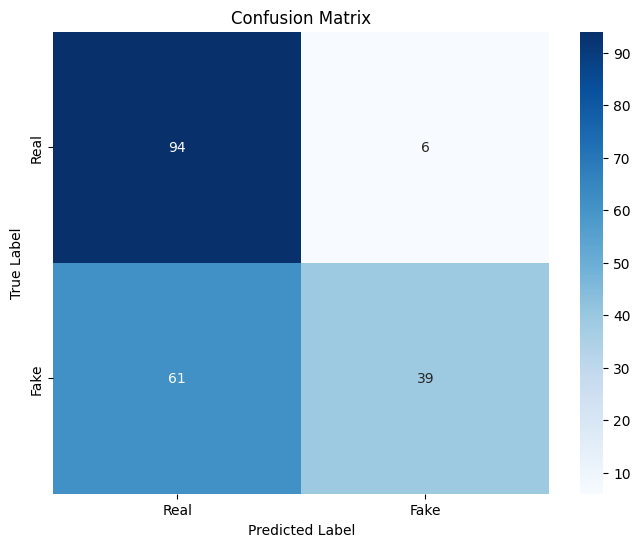

Classification Report:
              precision    recall  f1-score   support

        Real       0.61      0.94      0.74       100
        Fake       0.87      0.39      0.54       100

    accuracy                           0.67       200
   macro avg       0.74      0.67      0.64       200
weighted avg       0.74      0.67      0.64       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [06:15,  3.75s/it]

[[367  33]
 [ 44 356]]


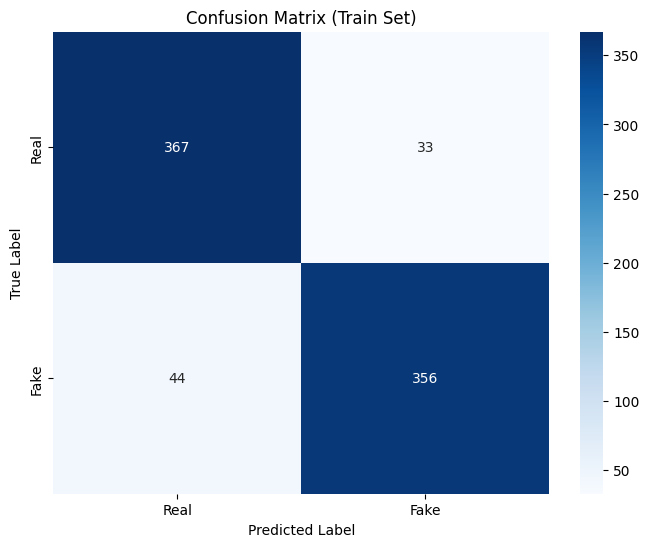

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.89      0.92      0.91       400
        Fake       0.92      0.89      0.90       400

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 2, train loss: 0.24968075271695853, val loss: 0.9987230108678341, executed in: 461.6577076911926
train total: 800, train correct: 723.0, train incorrect: 77.0, train accuracy: 0.9037500023841858
valid total: 200, valid correct: 148.0, valid incorrect: 52.0, valid accuracy: 0.7400000095367432


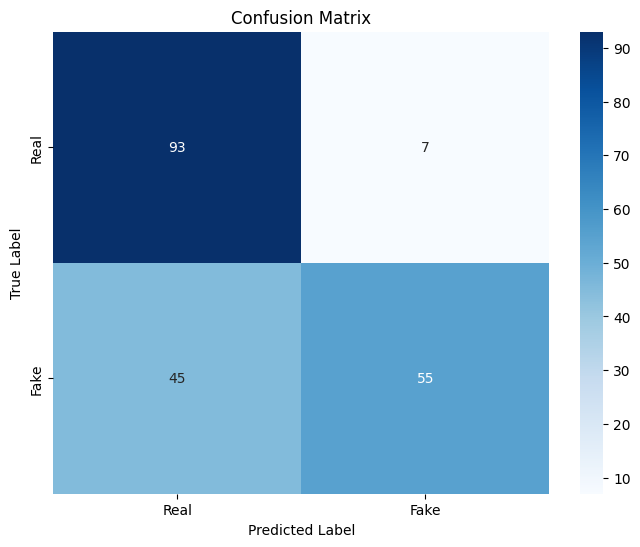

Classification Report:
              precision    recall  f1-score   support

        Real       0.67      0.93      0.78       100
        Fake       0.89      0.55      0.68       100

    accuracy                           0.74       200
   macro avg       0.78      0.74      0.73       200
weighted avg       0.78      0.74      0.73       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [06:17,  3.77s/it]

[[369  31]
 [ 43 357]]


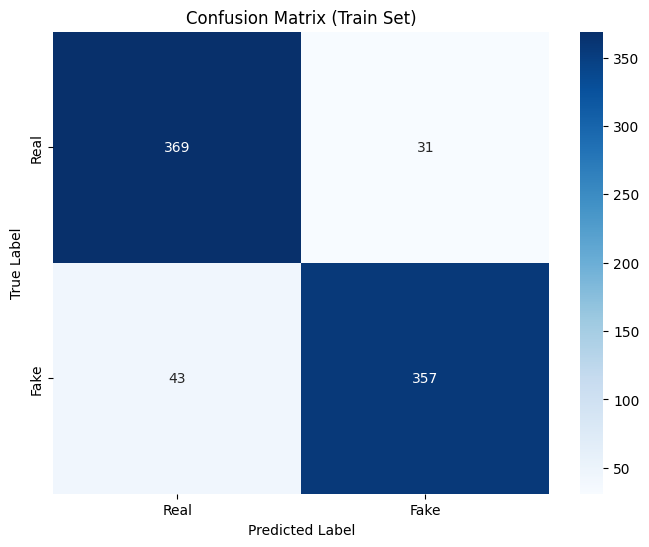

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.90      0.92      0.91       400
        Fake       0.92      0.89      0.91       400

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 3, train loss: 0.22299861351028086, val loss: 0.8919944540411234, executed in: 464.19918632507324
train total: 800, train correct: 726.0, train incorrect: 74.0, train accuracy: 0.9074999690055847
valid total: 200, valid correct: 169.0, valid incorrect: 31.0, valid accuracy: 0.8449999690055847


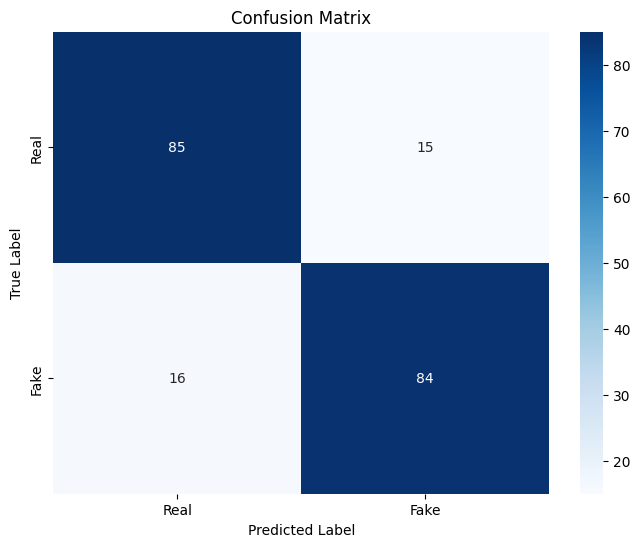

Classification Report:
              precision    recall  f1-score   support

        Real       0.84      0.85      0.85       100
        Fake       0.85      0.84      0.84       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [06:19,  3.79s/it]

[[378  22]
 [ 45 355]]


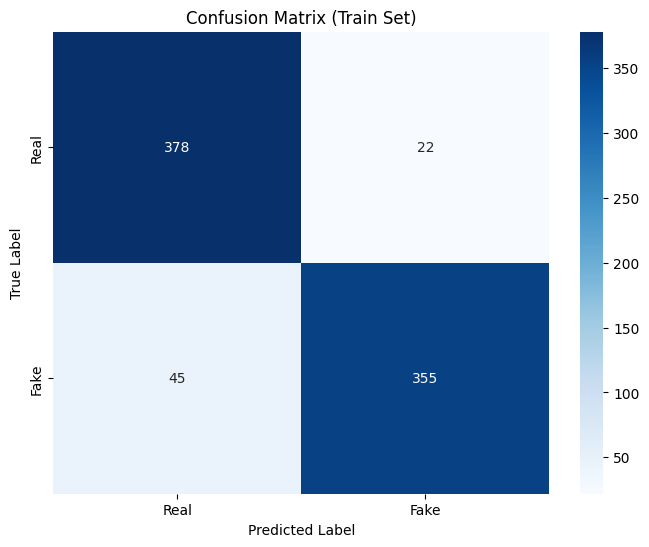

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.89      0.94      0.92       400
        Fake       0.94      0.89      0.91       400

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 4, train loss: 0.2114074496552348, val loss: 0.8456297986209392, executed in: 466.93115067481995
train total: 800, train correct: 733.0, train incorrect: 67.0, train accuracy: 0.9162499904632568
valid total: 200, valid correct: 171.0, valid incorrect: 29.0, valid accuracy: 0.8549999594688416


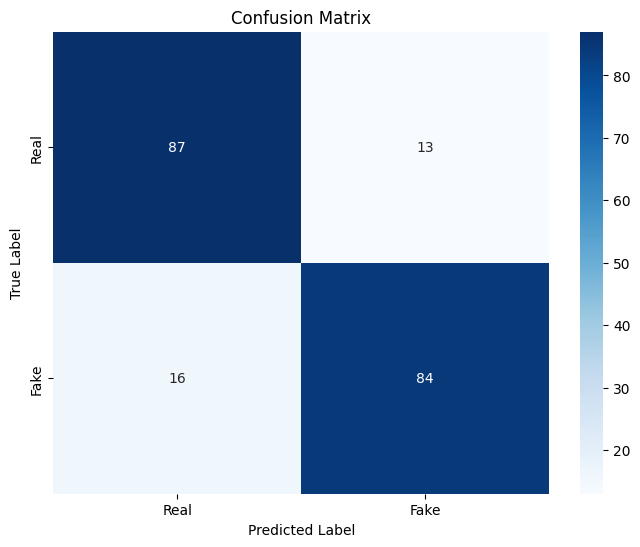

Classification Report:
              precision    recall  f1-score   support

        Real       0.84      0.87      0.86       100
        Fake       0.87      0.84      0.85       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [06:20,  3.80s/it]

[[378  22]
 [ 29 371]]


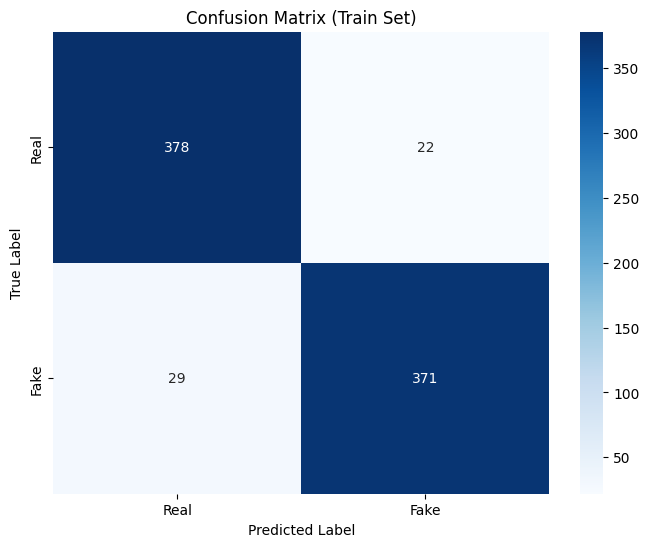

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.93      0.94      0.94       400
        Fake       0.94      0.93      0.94       400

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 5, train loss: 0.144056242716033, val loss: 0.576224970864132, executed in: 468.4258363246918
train total: 800, train correct: 749.0, train incorrect: 51.0, train accuracy: 0.9362499713897705
valid total: 200, valid correct: 169.0, valid incorrect: 31.0, valid accuracy: 0.8449999690055847


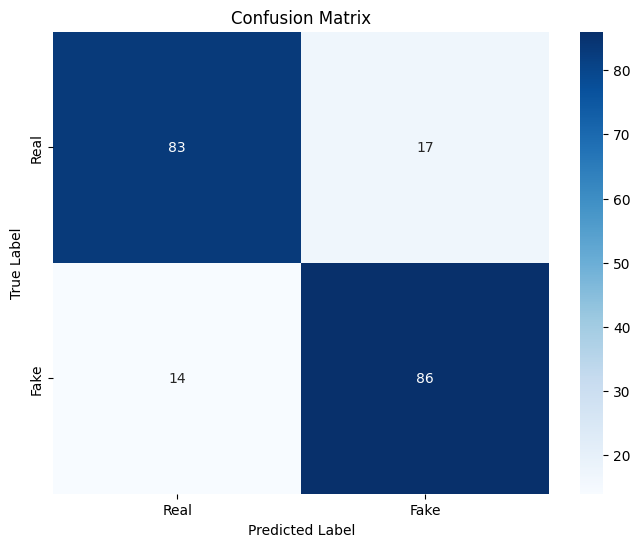

Classification Report:
              precision    recall  f1-score   support

        Real       0.86      0.83      0.84       100
        Fake       0.83      0.86      0.85       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [06:23,  3.83s/it]

[[371  29]
 [ 26 374]]


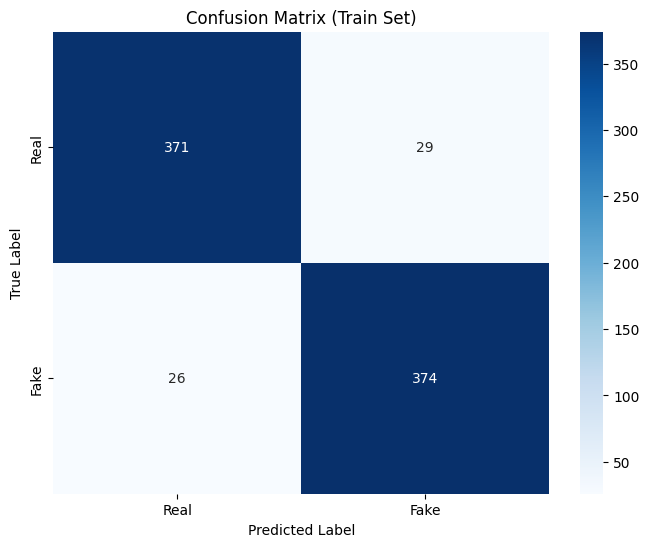

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.93      0.93      0.93       400
        Fake       0.93      0.94      0.93       400

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 6, train loss: 0.1509389463090338, val loss: 0.6037557852361352, executed in: 471.8679404258728
train total: 800, train correct: 745.0, train incorrect: 55.0, train accuracy: 0.9312499761581421
valid total: 200, valid correct: 171.0, valid incorrect: 29.0, valid accuracy: 0.8549999594688416


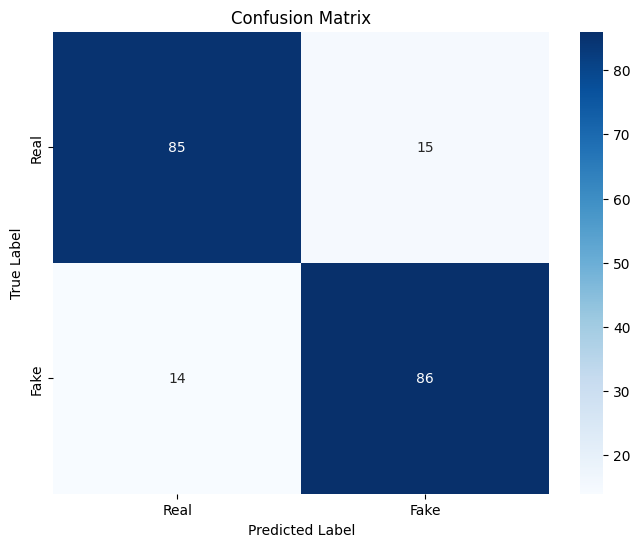

Classification Report:
              precision    recall  f1-score   support

        Real       0.86      0.85      0.85       100
        Fake       0.85      0.86      0.86       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [06:22,  3.83s/it]

[[389  11]
 [ 15 385]]


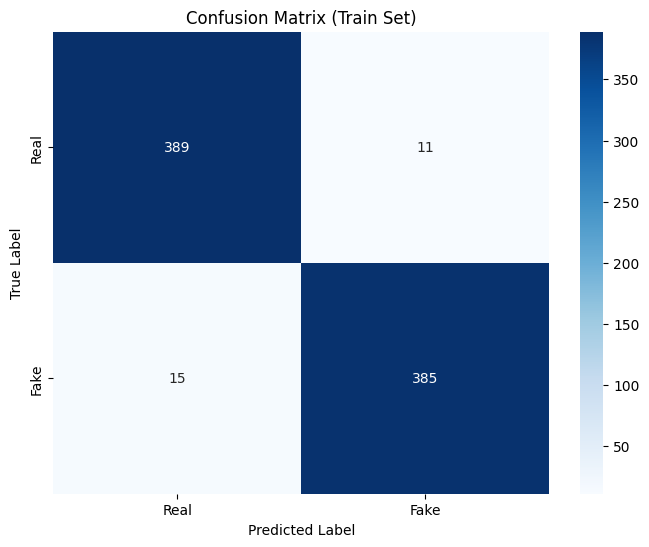

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.96      0.97      0.97       400
        Fake       0.97      0.96      0.97       400

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 7, train loss: 0.07703656810568646, val loss: 0.30814627242274584, executed in: 471.24089455604553
train total: 800, train correct: 774.0, train incorrect: 26.0, train accuracy: 0.9674999713897705
valid total: 200, valid correct: 168.0, valid incorrect: 32.0, valid accuracy: 0.8399999737739563


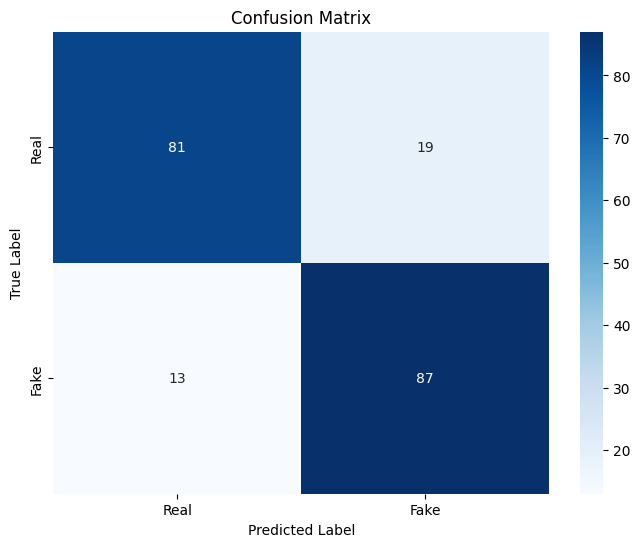

Classification Report:
              precision    recall  f1-score   support

        Real       0.86      0.81      0.84       100
        Fake       0.82      0.87      0.84       100

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

end time: 2024-11-10 09:35:56.623113
executed in: 1:15:38.054998
Tesla T4
Memory Usage:
Allocated: 0.9 GB
Cached:    1.2 GB


<ipython-input-18-6b50bcafa2db>:224: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


In [18]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import datetime
import sys
import pandas as pd
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import gc


base_path = 'deepfake-detection-challenge'

#train_folder = os.listdir(str(sys.argv[1]))
train_folders = ['/content/FakeAVCeleb']


#test_folder = os.listdir(str(sys.argv[2]))
test_folders = ['/content/fake_videos/train']

batch_size = int(8)
num_epochs = int(8)
n_frames = int(30)
lr = float(0.001)

TRAIN_FOLDERS = train_folders
TEST_FOLDERS = test_folders
print(f"all train folders: {train_folders}, {type(train_folders)}")
print(f"all test folders: {test_folders}, {type(test_folders)}")

milestones = [6,12,18]
gamma = 0.1

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


model = FaceClassifier()
#model.load_state_dict(torch.load('/content/drive/MyDrive/b7_faces_224_b0_lstm_celebav_1_classifier_30_small.pt', map_location=device))
model = model.to(device)
class_weights = {0: 0.6191950464396285, 1: 10.1230}
weights_tensor = torch.tensor([class_weights[0], 10.1230], dtype=torch.float32).to(device)

# Modify the loss function
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=gamma)

start_time = datetime.datetime.now()
print(f'start time: {str(start_time)}')
print(f'using device: {device}')

'''Splitting into Train and Validation'''
train_dataset = FaceDeepfakeDataset(TRAIN_FOLDERS,  n_frames=n_frames, n_audio_reads=576, device=device, cache_folder="face_encode_cache")
test_dataset = FaceDeepfakeDatasetTest(TEST_FOLDERS, n_frames=n_frames, n_audio_reads=576, device=device, cache_folder="face_encode_cache")

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
print(len(train_loader))

'''Train_Loop'''
train_losses = []
val_losses = []
best_loss = np.inf
train_accuracies = []
val_accuracies = []
epoch_times = []


for epoch in range(num_epochs):
    epoch_start_time = time.time()
    epoch_t_loss = 0
    epoch_v_loss = 0
    t_count = 0
    t_count_wrong = 0
    train_labels_all = []
    train_preds_all = []

    model.train()
    torch.cuda.empty_cache()
    gc.collect()
    for i, batch in tqdm(enumerate(train_loader)):
        torch.cuda.empty_cache()
        gc.collect()
        # if i * batch_size >= epoch_size:
        #     break
        video_data, labels = batch
        video_data = video_data.to(device)
        #audio_data = audio_data.to(device)

        output = model(video_data)
        loss = criterion(output, labels)

        output = torch.sigmoid(output)
        output = output.round()

        n_wrong = (labels - output).abs().sum()
        t_count_wrong += n_wrong
        t_count += labels.shape[0]

        epoch_t_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_labels_all.extend(labels.cpu().detach().numpy())
        train_preds_all.extend(output.cpu().detach().numpy())

        #print('.', end='', flush=True)
        torch.cuda.empty_cache()
        gc.collect()

    # Перетворіть на numpy-масиви
    train_labels_all = np.array(train_labels_all).astype(int)
    train_preds_all = np.array(train_preds_all).astype(int)

    # Обчисліть та виведіть матрицю плутанини для тренувального набору
    conf_matrix_train = confusion_matrix(train_labels_all, train_preds_all)
    print(conf_matrix_train)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Train Set)')
    plt.show()

    # Виведіть класифікаційний звіт для тренувального набору
    print("Classification Report (Train Set):")
    print(classification_report(train_labels_all, train_preds_all, target_names=['Real', 'Fake']))

    all_labels = []
    all_preds = []

    model.eval()
    with torch.no_grad():
        v_count = 0
        v_count_wrong = 0
        for i, batch in enumerate(val_loader):
            # if i * batch_size >= epoch_size:
        #        break
            torch.cuda.empty_cache()
            gc.collect()
            video_data, labels = batch
            video_data = video_data.to(device)
            #audio_data = audio_data.to(device)
            # optimizer.zero_grad()
            output = model(video_data)
            loss = criterion(output, labels)

            output = torch.sigmoid(output)
            output = output.round()
            n_wrong = (labels - output).abs().sum()
            v_count_wrong += n_wrong
            v_count += labels.shape[0]

            epoch_v_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.cpu().numpy())

            # loss.backward()
            # optimizer.step()
            print('.', end='', flush=True)
            torch.cuda.empty_cache()
            gc.collect()

    epoch_end_time = time.time()
    epoch_exec_time = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_exec_time)
    train_losses.append(epoch_t_loss/len(train_loader))
    val_losses.append(epoch_t_loss/len(val_loader))

    t_count_right = t_count - t_count_wrong
    v_count_right = v_count - v_count_wrong
    t_accuracy = t_count_right / t_count
    v_accuracy = v_count_right / v_count

    train_accuracies.append(t_accuracy)
    val_accuracies.append(v_accuracy)

    print(f'\nepoch: {epoch}, train loss: {train_losses[-1]}, val loss: {val_losses[-1]}, executed in: {str(epoch_exec_time)}')
    print(f"train total: {t_count}, train correct: {t_count_right}, train incorrect: {t_count_wrong}, train accuracy: {t_accuracy}")
    print(f"valid total: {v_count}, valid correct: {v_count_right}, valid incorrect: {v_count_wrong}, valid accuracy: {v_accuracy}")
    all_labels = np.array(all_labels).astype(int)
    all_preds = np.array(all_preds).astype(int)
    # Обчислення та візуалізація матриці плутанини
    conf_matrix = confusion_matrix(all_labels, all_preds)
    #print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Друк звіту про класифікацію
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Real', 'Fake']))

    scheduler.step()
    ### Saving model per best validation loss
    if best_loss > val_losses[-1]:
        best_loss = val_losses[-1]
        end_time = datetime.datetime.now()
        torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/fakeavceleb_no_bi_train_test_split_b7_{epoch + 1}_classifier_{n_frames}_small.pt')
    torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/fakeavceleb_no_bi_train_test_split_b7_{epoch + 1}_classifier_{n_frames}_small.pt')


end_time = datetime.datetime.now()
print(f"end time: {str(end_time)}")
exec_time = end_time - start_time
print(f"executed in: {str(exec_time)}")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [06:26,  3.87s/it]

[[391   9]
 [ 16 384]]


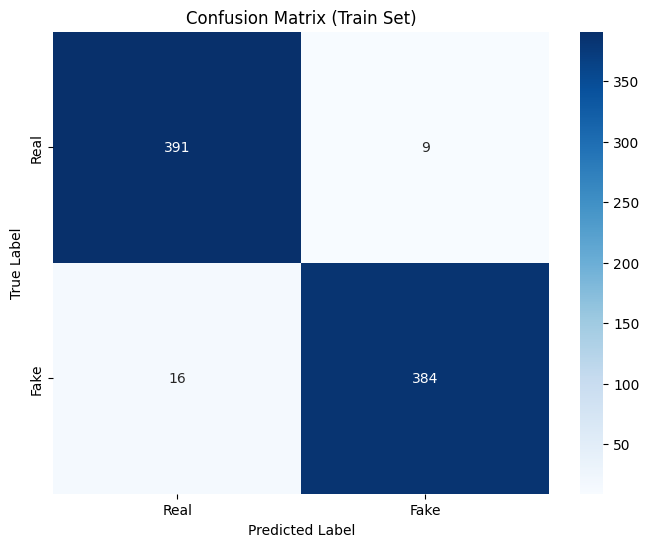

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.96      0.98      0.97       400
        Fake       0.98      0.96      0.97       400

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 9, train loss: 0.07471322993515059, val loss: 0.29885291974060235, executed in: 475.7866487503052
train total: 800, train correct: 775.0, train incorrect: 25.0, train accuracy: 0.96875
valid total: 200, valid correct: 168.0, valid incorrect: 32.0, valid accuracy: 0.8399999737739563


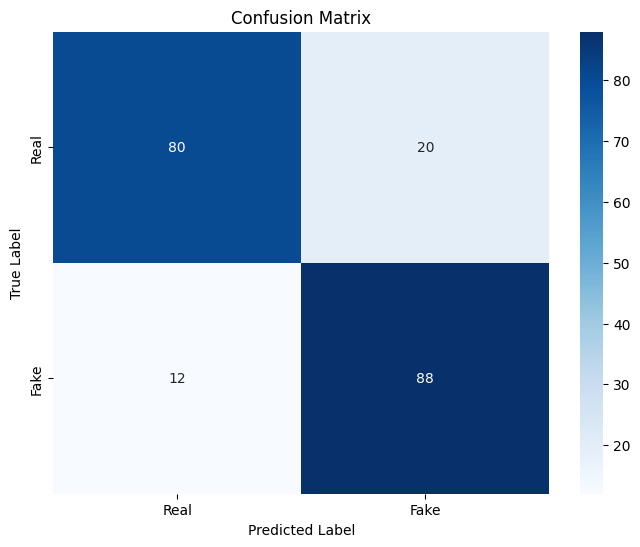

Classification Report:
              precision    recall  f1-score   support

        Real       0.87      0.80      0.83       100
        Fake       0.81      0.88      0.85       100

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [06:25,  3.86s/it]

[[369  31]
 [ 26 374]]


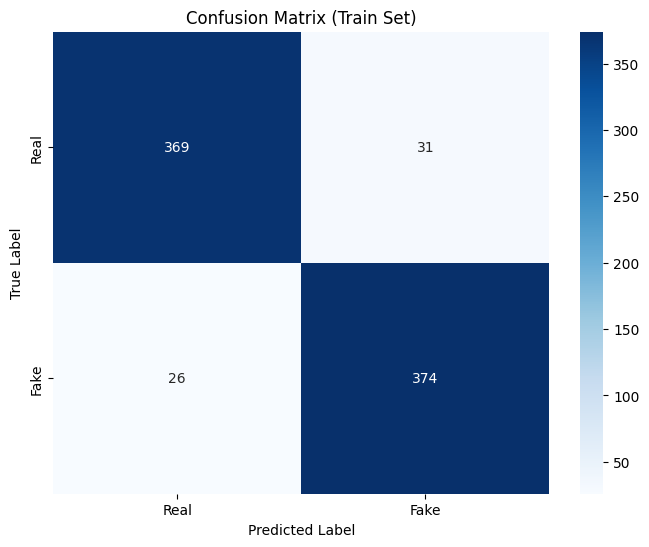

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.93      0.92      0.93       400
        Fake       0.92      0.94      0.93       400

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 10, train loss: 0.148844210881507, val loss: 0.595376843526028, executed in: 475.2555139064789
train total: 800, train correct: 743.0, train incorrect: 57.0, train accuracy: 0.9287499785423279
valid total: 200, valid correct: 169.0, valid incorrect: 31.0, valid accuracy: 0.8449999690055847


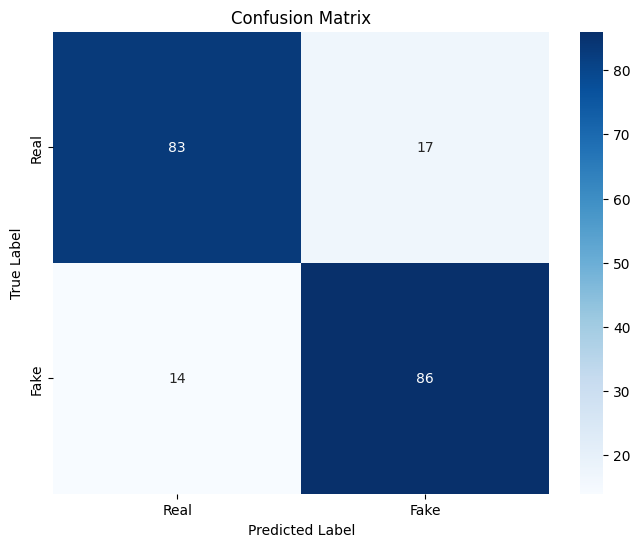

Classification Report:
              precision    recall  f1-score   support

        Real       0.86      0.83      0.84       100
        Fake       0.83      0.86      0.85       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



0it [00:00, ?it/s]<ipython-input-11-44029ff5ff11>:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)
100it [06:25,  3.86s/it]

[[387  13]
 [ 20 380]]


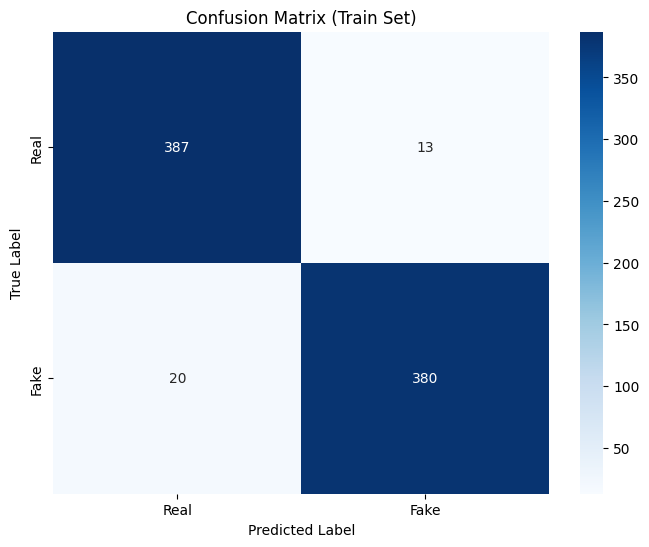

Classification Report (Train Set):
              precision    recall  f1-score   support

        Real       0.95      0.97      0.96       400
        Fake       0.97      0.95      0.96       400

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



<ipython-input-13-f0311e68c65b>:80: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  frames = torch.load(cache_file).to(self.device)


.........................
epoch: 11, train loss: 0.09169991813600063, val loss: 0.36679967254400253, executed in: 475.2663128376007
train total: 800, train correct: 767.0, train incorrect: 33.0, train accuracy: 0.9587499499320984
valid total: 200, valid correct: 169.0, valid incorrect: 31.0, valid accuracy: 0.8449999690055847


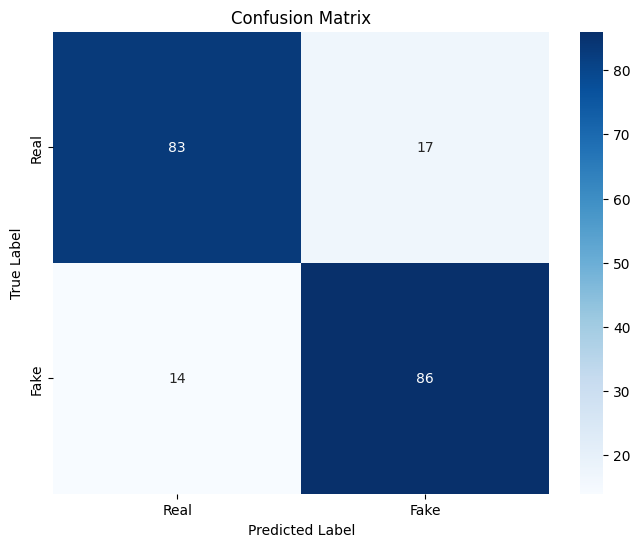

Classification Report:
              precision    recall  f1-score   support

        Real       0.86      0.83      0.84       100
        Fake       0.83      0.86      0.85       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200

end time: 2024-11-10 10:06:26.549056
executed in: 1:46:07.980941
Tesla T4
Memory Usage:
Allocated: 0.9 GB


In [19]:
for epoch in range(3):
    epoch_start_time = time.time()
    epoch_t_loss = 0
    epoch_v_loss = 0
    t_count = 0
    t_count_wrong = 0
    train_labels_all = []
    train_preds_all = []

    model.train()
    torch.cuda.empty_cache()
    gc.collect()
    for i, batch in tqdm(enumerate(train_loader)):
        torch.cuda.empty_cache()
        gc.collect()
        # if i * batch_size >= epoch_size:
        #     break
        video_data, labels = batch
        video_data = video_data.to(device)
        #audio_data = audio_data.to(device)

        output = model(video_data)
        loss = criterion(output, labels)

        output = torch.sigmoid(output)
        output = output.round()

        n_wrong = (labels - output).abs().sum()
        t_count_wrong += n_wrong
        t_count += labels.shape[0]

        epoch_t_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_labels_all.extend(labels.cpu().detach().numpy())
        train_preds_all.extend(output.cpu().detach().numpy())

        #print('.', end='', flush=True)
        torch.cuda.empty_cache()
        gc.collect()

    # Перетворіть на numpy-масиви
    train_labels_all = np.array(train_labels_all).astype(int)
    train_preds_all = np.array(train_preds_all).astype(int)

    # Обчисліть та виведіть матрицю плутанини для тренувального набору
    conf_matrix_train = confusion_matrix(train_labels_all, train_preds_all)
    print(conf_matrix_train)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix (Train Set)')
    plt.show()

    # Виведіть класифікаційний звіт для тренувального набору
    print("Classification Report (Train Set):")
    print(classification_report(train_labels_all, train_preds_all, target_names=['Real', 'Fake']))

    all_labels = []
    all_preds = []

    model.eval()
    with torch.no_grad():
        v_count = 0
        v_count_wrong = 0
        for i, batch in enumerate(val_loader):
            # if i * batch_size >= epoch_size:
        #        break
            torch.cuda.empty_cache()
            gc.collect()
            video_data, labels = batch
            video_data = video_data.to(device)
            #audio_data = audio_data.to(device)
            # optimizer.zero_grad()
            output = model(video_data)
            loss = criterion(output, labels)

            output = torch.sigmoid(output)
            output = output.round()
            n_wrong = (labels - output).abs().sum()
            v_count_wrong += n_wrong
            v_count += labels.shape[0]

            epoch_v_loss += loss.item()

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(output.cpu().numpy())

            # loss.backward()
            # optimizer.step()
            print('.', end='', flush=True)
            torch.cuda.empty_cache()
            gc.collect()

    epoch_end_time = time.time()
    epoch_exec_time = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_exec_time)
    train_losses.append(epoch_t_loss/len(train_loader))
    val_losses.append(epoch_t_loss/len(val_loader))

    t_count_right = t_count - t_count_wrong
    v_count_right = v_count - v_count_wrong
    t_accuracy = t_count_right / t_count
    v_accuracy = v_count_right / v_count

    train_accuracies.append(t_accuracy)
    val_accuracies.append(v_accuracy)

    print(f'\nepoch: {epoch + 9}, train loss: {train_losses[-1]}, val loss: {val_losses[-1]}, executed in: {str(epoch_exec_time)}')
    print(f"train total: {t_count}, train correct: {t_count_right}, train incorrect: {t_count_wrong}, train accuracy: {t_accuracy}")
    print(f"valid total: {v_count}, valid correct: {v_count_right}, valid incorrect: {v_count_wrong}, valid accuracy: {v_accuracy}")
    all_labels = np.array(all_labels).astype(int)
    all_preds = np.array(all_preds).astype(int)
    # Обчислення та візуалізація матриці плутанини
    conf_matrix = confusion_matrix(all_labels, all_preds)
    #print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Друк звіту про класифікацію
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=['Real', 'Fake']))

    scheduler.step()
    ### Saving model per best validation loss
    if best_loss > val_losses[-1]:
        best_loss = val_losses[-1]
        end_time = datetime.datetime.now()
        torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/fakeavceleb_no_bi_train_test_split_b7_{epoch + 9}_classifier_{n_frames}_small.pt')
    torch.save(model.state_dict(), f'/content/drive/MyDrive/experiments/fakeavceleb_no_bi_train_test_split_b7_{epoch + 9}_classifier_{n_frames}_small.pt')


end_time = datetime.datetime.now()
print(f"end time: {str(end_time)}")
exec_time = end_time - start_time
print(f"executed in: {str(exec_time)}")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')